<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/danielle-macinnes-IuLgi9PWETU-unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by Danielle MacInnes on Unsplash</figcaption>
</div>

# Introduction to Machine Learning

**Applied Programming - Summer term 2022 - FOM Hochschule für Oekonomie und Management - Cologne**

**Lecture 06 - April 29, 2022**

*Dennis Gluesenkamp*

## Table of contents
* [Introduction](#introduction)
* [Dataset creation](#datasetcreation)
    * [Classification](#datasetcreation_classification)
    * [Regression](#datasetcreation_regression)
* [The decision tree as the first reference model](#decisiontree)
    * [Classification](#decisiontree_classification)
    * [Regression](#decisiontree_regression)
* [References](#references)

## Introduction<a class="anchor" id="introduction"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

np.random.seed(42)

## Dataset creation<a class="anchor" id="datasetcreation"></a>
In order to get a step-by-step understanding of the topic, application and functionality of Machine Learning, we will first use artificially generated data sets for initial, simple models. This allows us to get to know the structure of modeling with scikit-learn and thus forms the basis for later, more complex applications. The generated datasets may be focused on classification or regression problems and include features that do not claim to represent real values of any particular magnitude or characteristic. Thus, they are simply numerical columns without (physical) units.

### Classification<a class="anchor" id="datasetcreation_classification"></a>
First, we want to generate a dataset for a classification problem, and we can call the ``make_classification()`` function to do this, which is located in the ``datasets`` module of scikit-learn. [[1]](#sklearn2021a)

In [2]:
from sklearn.datasets import make_classification

In [3]:
# Let's check output of function directly
make_classification()

(array([[-2.02514259,  0.0291022 , -0.47494531, ..., -0.33450124,
          0.86575519, -1.20029641],
        [ 1.61371127,  0.65992405, -0.15005559, ...,  1.37570681,
          0.70117274, -0.2975635 ],
        [ 0.16645221,  0.95057302,  1.42050425, ...,  1.18901653,
         -0.55547712, -0.63738713],
        ...,
        [-0.03955515, -1.60499282,  0.22213377, ..., -0.30917212,
         -0.46227529, -0.43449623],
        [ 1.08589557,  1.2031659 , -0.6095122 , ..., -0.3052247 ,
         -1.31183623, -1.06511366],
        [-0.00607091,  1.30857636, -0.17495976, ...,  0.99204235,
          0.32169781, -0.66809045]]),
 array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]))

In [6]:
make_classification()[0].shape

(100, 20)

In [4]:
pd.DataFrame(make_classification()[0]).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.050009,0.182902,0.157961,0.013065,-0.005725,0.011893,-0.075997,-0.090215,0.049004,-0.027507,0.063556,-0.028245,-0.061140,-0.004616,-0.220921,-0.120975,0.029063,0.104513,-0.186456,0.150162
std,0.959379,0.932613,0.928127,0.962783,1.113943,0.939813,1.431209,0.935033,1.343672,0.996805,1.082154,0.952018,1.103771,1.053305,0.978055,1.176153,0.955164,0.969399,1.073465,0.929554
min,-1.944902,-2.363968,-1.931377,-2.397499,-2.924925,-2.407344,-4.060017,-2.517143,-2.518249,-2.543498,-3.386814,-2.165482,-1.522271,-2.427203,-2.843485,-2.626786,-2.407868,-2.166381,-3.339500,-2.537389
25%,-0.815392,-0.440506,-0.617316,-0.561224,-0.905596,-0.659279,-1.184675,-0.492064,-1.081592,-0.656412,-0.639514,-0.728679,-0.999198,-0.820901,-0.823062,-0.920961,-0.594736,-0.645656,-0.855208,-0.403881
50%,0.206165,0.156352,0.074618,-0.002762,0.176929,-0.130523,-0.346877,-0.026034,0.157579,-0.068533,0.066721,0.002478,-0.674396,-0.050379,-0.221224,-0.240080,-0.001041,0.266445,-0.247270,0.164268
75%,0.789761,0.856743,0.778270,0.547594,0.827692,0.747419,1.169425,0.488199,1.165874,0.564688,0.802801,0.604951,0.926910,0.844560,0.583518,0.713737,0.709890,0.824396,0.697721,0.742361
max,2.732732,2.479389,2.920753,2.684346,2.114332,2.533516,2.925617,2.045817,3.792858,3.495878,2.333757,1.988768,2.794762,2.429144,1.420257,2.562528,2.429283,2.256272,2.136559,2.267180


In [7]:
pd.DataFrame(make_classification()[1]).describe()

,0
count,100.000000
mean,0.490000
std,0.502418
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
X0, y0 = make_classification(n_features           = 2,
                             n_informative        = 2,
                             n_redundant          = 0,
                             n_repeated           = 0,
                             n_clusters_per_class = 2)

In [9]:
print(X0.shape)
print(y0.shape)

(100, 2)
(100,)


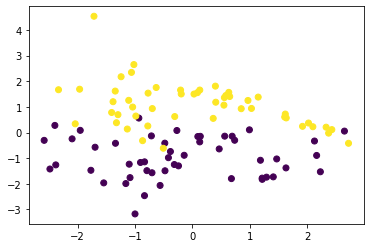

In [10]:
plt.scatter(X0[:, 0], X0[:, 1],
            marker = 'o',
            c      = y0)
plt.draw()

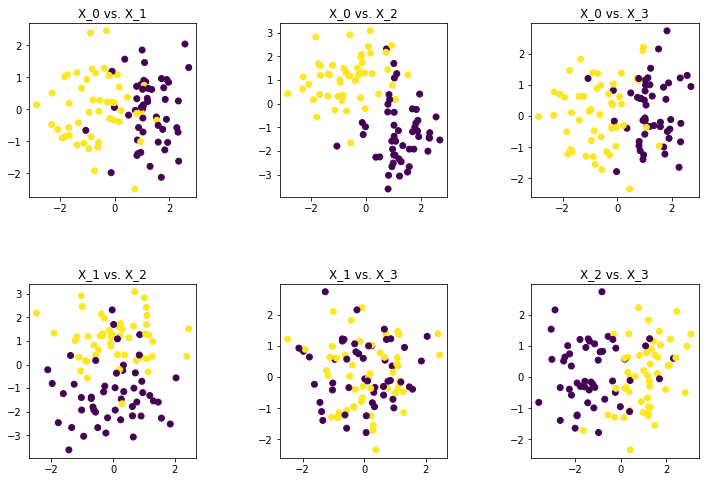

In [11]:
Xc, yc = make_classification(n_features           = 6,
                             n_informative        = 4,
                             n_redundant          = 0,
                             n_repeated           = 0,
                             n_clusters_per_class = 1,
                             random_state         = 123)

plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace = .5, hspace = .5)
plt.subplot(2, 3, 1)
plt.scatter(Xc[:, 0], Xc[:, 1],
            marker = 'o',
            c      = yc)
plt.title('X_0 vs. X_1')

plt.subplot(2, 3, 2)
plt.scatter(Xc[:, 0], Xc[:, 2],
            marker = 'o',
            c      = yc)
plt.title('X_0 vs. X_2')

plt.subplot(2, 3, 3)
plt.scatter(Xc[:, 0], Xc[:, 3],
            marker = 'o',
            c      = yc)
plt.title('X_0 vs. X_3')

plt.subplot(2, 3, 4)
plt.scatter(Xc[:, 1], Xc[:, 2],
            marker = 'o',
            c      = yc)
plt.title('X_1 vs. X_2')

plt.subplot(2, 3, 5)
plt.scatter(Xc[:, 1], Xc[:, 3],
            marker = 'o',
            c      = yc)
plt.title('X_1 vs. X_3')

plt.subplot(2, 3, 6)
plt.scatter(Xc[:, 2], Xc[:, 3],
            marker = 'o',
            c      = yc)
plt.title('X_2 vs. X_3')

plt.draw()

In [12]:
dfc = pd.DataFrame(np.c_[Xc, yc])
dfc

,0,1,2,3,4,5,6
0,0.749201,-0.028869,2.312806,0.600660,5.100150,4.681691,0.0
1,-0.875829,-0.854163,0.137335,-1.304681,0.501743,-1.091356,1.0
2,-0.944812,-0.089614,0.896005,-0.784831,1.047849,-0.431471,1.0
3,-1.673899,0.189492,1.603466,0.112707,0.289196,-2.021954,1.0
4,1.791187,0.677320,-0.997373,0.542171,3.344389,3.618464,0.0
...,...,...,...,...,...,...,...
95,0.942196,-1.003429,2.455265,2.105075,2.256011,-0.595966,1.0
96,-1.842801,1.018963,2.822997,-0.504778,0.416844,-3.117302,1.0
97,-2.320655,-0.472584,0.621794,0.028352,2.453334,1.356899,1.0
98,2.706926,1.309350,-1.538845,0.950470,2.274352,2.704643,0.0


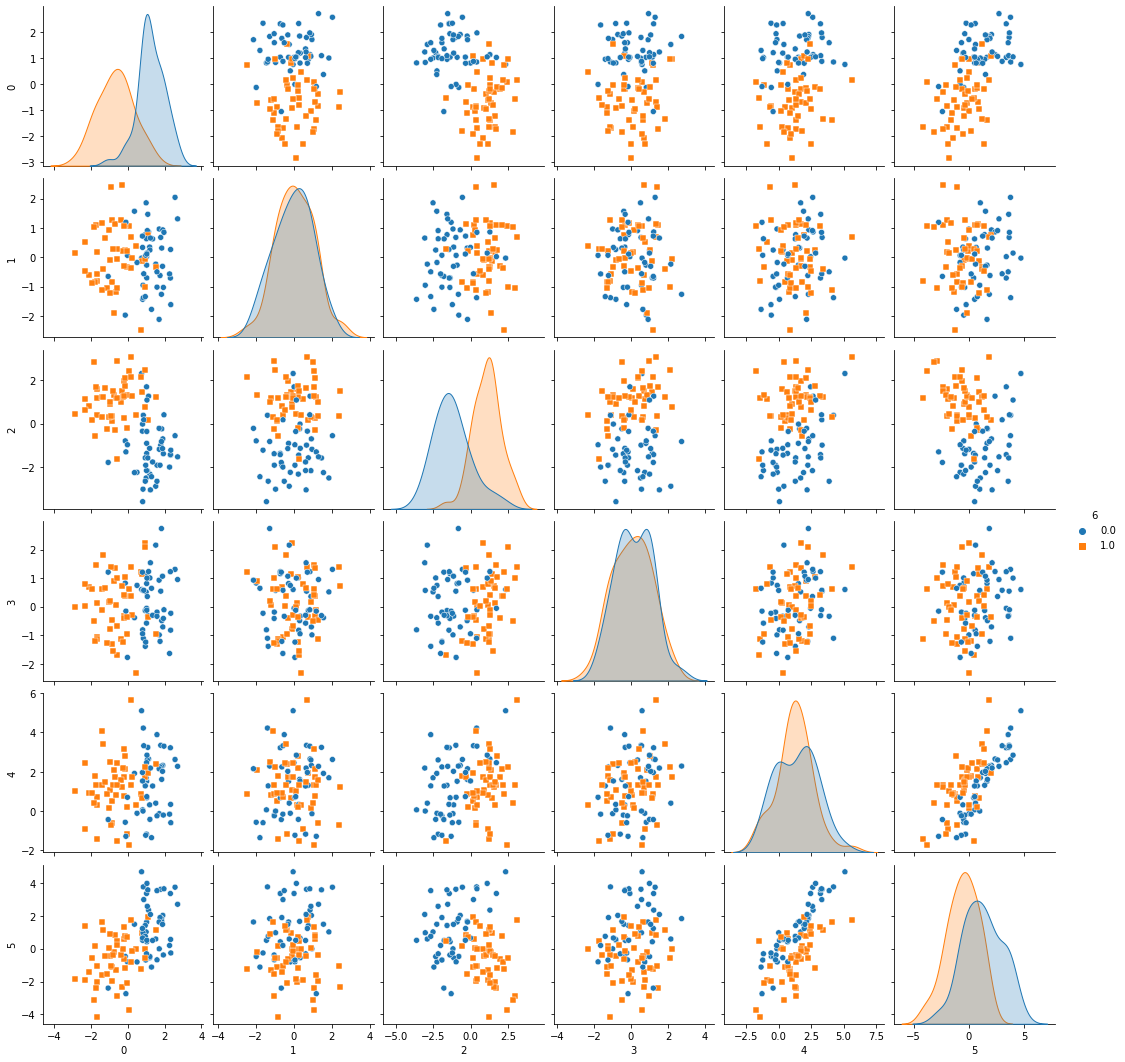

In [13]:
sns.pairplot(dfc, hue = 6, markers=['o', 's'])
plt.draw()

In [16]:
Xq1, yq1 = make_classification(n_samples     = 1000,
                               n_informative = 5,
                               n_classes     = 10)

In [17]:
dfq1 = pd.DataFrame(np.c_[Xq1, yq1])
dfq1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.087625,0.937677,0.753951,0.218085,1.097775,0.285818,1.902726,-0.628148,0.123314,-0.679163,...,-2.187249,0.186928,1.060421,3.080248,-0.026416,0.836445,2.098782,-3.833288,0.452758,5.0
1,-0.870693,-0.570415,1.559261,-1.353904,-0.110327,1.144939,0.193346,-1.502914,0.543046,-1.606567,...,0.969430,0.017310,1.434804,-0.079207,1.602623,-0.512131,-0.192426,-0.513333,-1.183640,2.0
2,-0.709798,0.320060,-1.626435,-0.146423,0.079514,0.734334,-2.157812,0.736572,1.216534,-1.392343,...,0.761760,0.477978,0.160103,-0.922640,2.601771,-1.481486,-3.185215,-0.883625,1.572718,3.0
3,0.594131,0.962511,-1.570914,-0.564098,0.855364,0.884200,3.048193,0.625781,-0.347248,0.796469,...,-1.768356,0.049037,-0.658996,-0.593303,-3.421478,-0.356885,3.887313,-2.362556,0.125171,3.0
4,-0.170539,-1.002254,-0.272830,1.329390,-0.659869,0.046068,0.407117,-0.891678,0.410675,0.536917,...,-1.012603,0.329497,0.802790,0.408425,-1.400692,0.395130,1.358454,-1.859080,-0.000472,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.485333,-0.825198,-1.291942,-0.688346,3.059706,0.611287,-0.170538,-1.186882,0.778973,0.271461,...,1.360438,0.250862,0.778753,0.976188,-1.026734,-0.862097,0.386869,-0.490650,-0.739702,3.0
996,0.306091,-0.930173,-1.091014,-2.784341,-1.309884,0.525362,-0.718642,-1.069907,0.002133,1.050370,...,3.440370,-1.790271,0.126696,-0.988307,-0.850044,0.033153,-0.593565,-0.474957,0.969693,1.0
997,0.091961,0.803394,0.855794,-1.008692,-1.392096,-1.733884,-1.899823,-0.699249,0.576195,-0.864981,...,2.171811,-1.566398,0.504166,1.231224,2.060748,-1.975879,-2.537089,0.433159,1.011292,7.0
998,0.196688,-0.142721,-0.679371,1.399211,1.785301,1.174689,-1.049909,-1.298913,0.674265,1.023150,...,-0.322493,-0.599126,1.155683,-1.293001,1.420751,-0.170297,-0.909978,-0.864755,0.225604,4.0


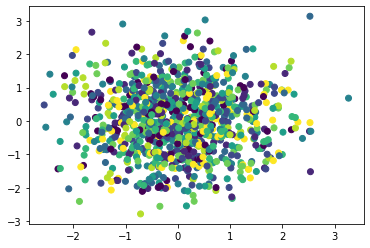

In [18]:
plt.scatter(Xq1[:, 0], Xq1[:, 1],
            marker = 'o',
            c      = yq1)
plt.draw()

### Regression<a class="anchor" id="datasetcreation_regression"></a>
In the second step, we also create a randomly generated regression problem. Here we access the function ``make_regression()``, which works analogously to the one from the classification [[1]](#sklearn2021a). We keep the most defaults. The only exception is the number of features, because we want to be able to plot the distributions of the dataset.

In [19]:
from sklearn.datasets import make_regression
make_regression()

(array([[-0.64011542,  0.0587492 , -0.71564726, ...,  1.0604867 ,
          0.74601301, -0.08519364],
        [ 1.69688107, -0.85584147,  0.03459614, ...,  1.63024364,
         -1.38047535, -0.76137239],
        [-1.26055568, -0.29609667, -0.46635881, ...,  0.21977622,
          0.26565272, -1.14622388],
        ...,
        [ 0.70877664,  0.74310826,  2.34403683, ..., -0.09854521,
          0.8215687 ,  0.46265493],
        [ 1.27338515, -0.2389565 ,  1.24033223, ..., -0.84047456,
          0.07490021,  0.98297486],
        [-0.60960782, -0.73735152, -0.6033385 , ...,  1.4473352 ,
          0.27747912,  1.95253066]]),
 array([ -97.07453673,   43.30551418, -206.4488426 ,   87.15766967,
        -310.98387615, -528.24018185,  -20.38646337, -396.32855187,
        -131.07749983,  161.56716347,  429.57277261, -144.00905178,
         -77.38548812,  218.08986805,  -79.72220513,   86.91968857,
         -84.63111834,  192.89400171, -175.76162486, -171.26422256,
        -109.36213868,  -32.74126

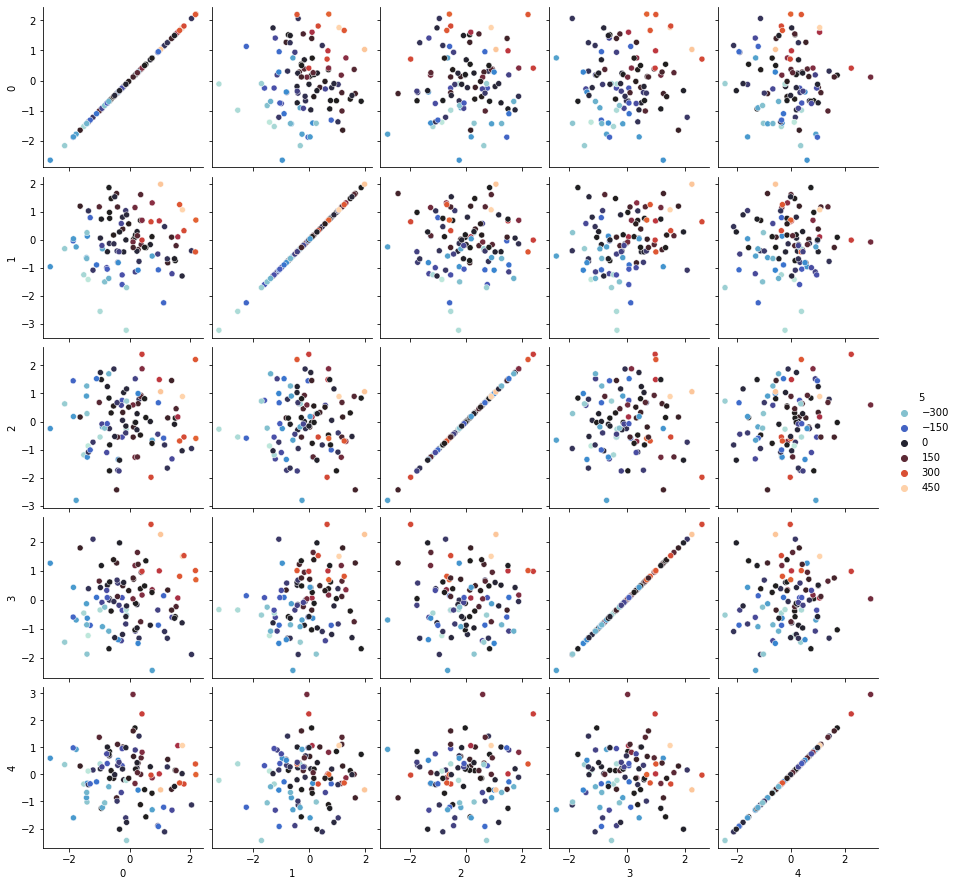

In [20]:
Xr, yr = make_regression(n_features   = 5,
                         random_state = 123)

dfr = pd.DataFrame(np.c_[Xr, yr])
sns.pairplot(dfr, hue = 5, palette = 'icefire', diag_kind = None)
plt.draw()

### Exercises<a class="anchor" id="datasetcreation_exercises"></a>
1. Go to the User Guide of scikit-learn to the chapter of "Toy Datasets designed for training" [[2]](#sklearn2021b). Now select one dataset each for regression and classification from the datasets offered there and familiarize yourself with the parameter ``return_X_y`` and (if available) ``as_frame`` and use them appropriately.
2. Import the necessary modules for the datasets you selected and create the data for each, as shown above for the generators. Choose some appropriate names which are different to the names for the generator datasets above.
3. Create a pairplot for each of the regression and classification and evaluate the results. **Be careful:** Using a dataset with a lot of features can lead to an extensive calcultation time! As an alternative, you can plot only some of the features.

In [21]:
from sklearn.datasets import load_iris

In [25]:
X_iris, y_iris = load_iris(return_X_y = True, as_frame = True)

In [34]:
X_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
pd.DataFrame(np.c_[X_iris, y_iris])

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [35]:
df_iris = pd.concat([X_iris, y_iris], axis = 1)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


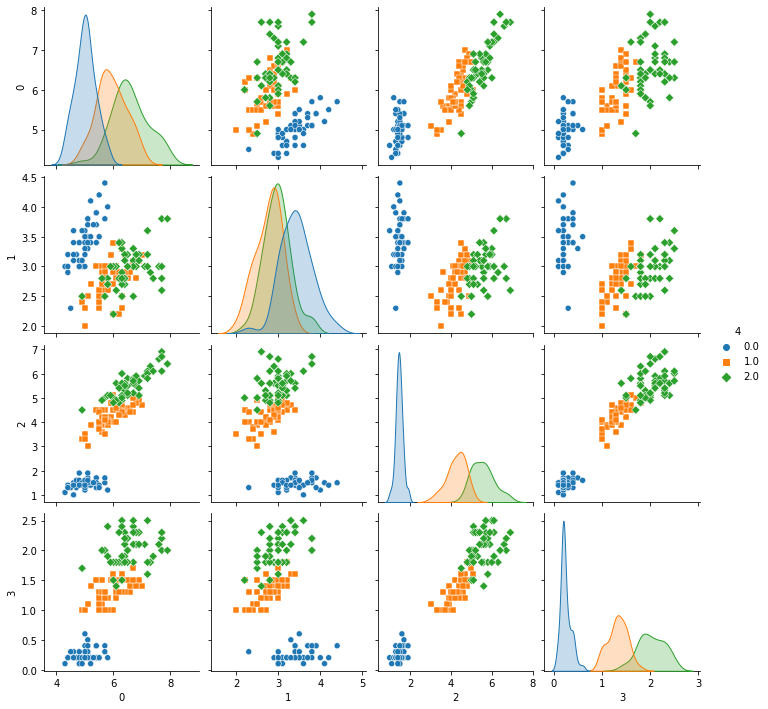

In [41]:
sns.pairplot(df_iris, hue = 'target', markers = ['o', 's', 'D'], palette = 'tab10')
plt.draw()

In [29]:
from sklearn.datasets import load_diabetes

X_dia, y_dia = load_diabetes(return_X_y = True, as_frame = True)

df_dia = pd.concat([X_dia, y_dia], axis = 1)
df_dia

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


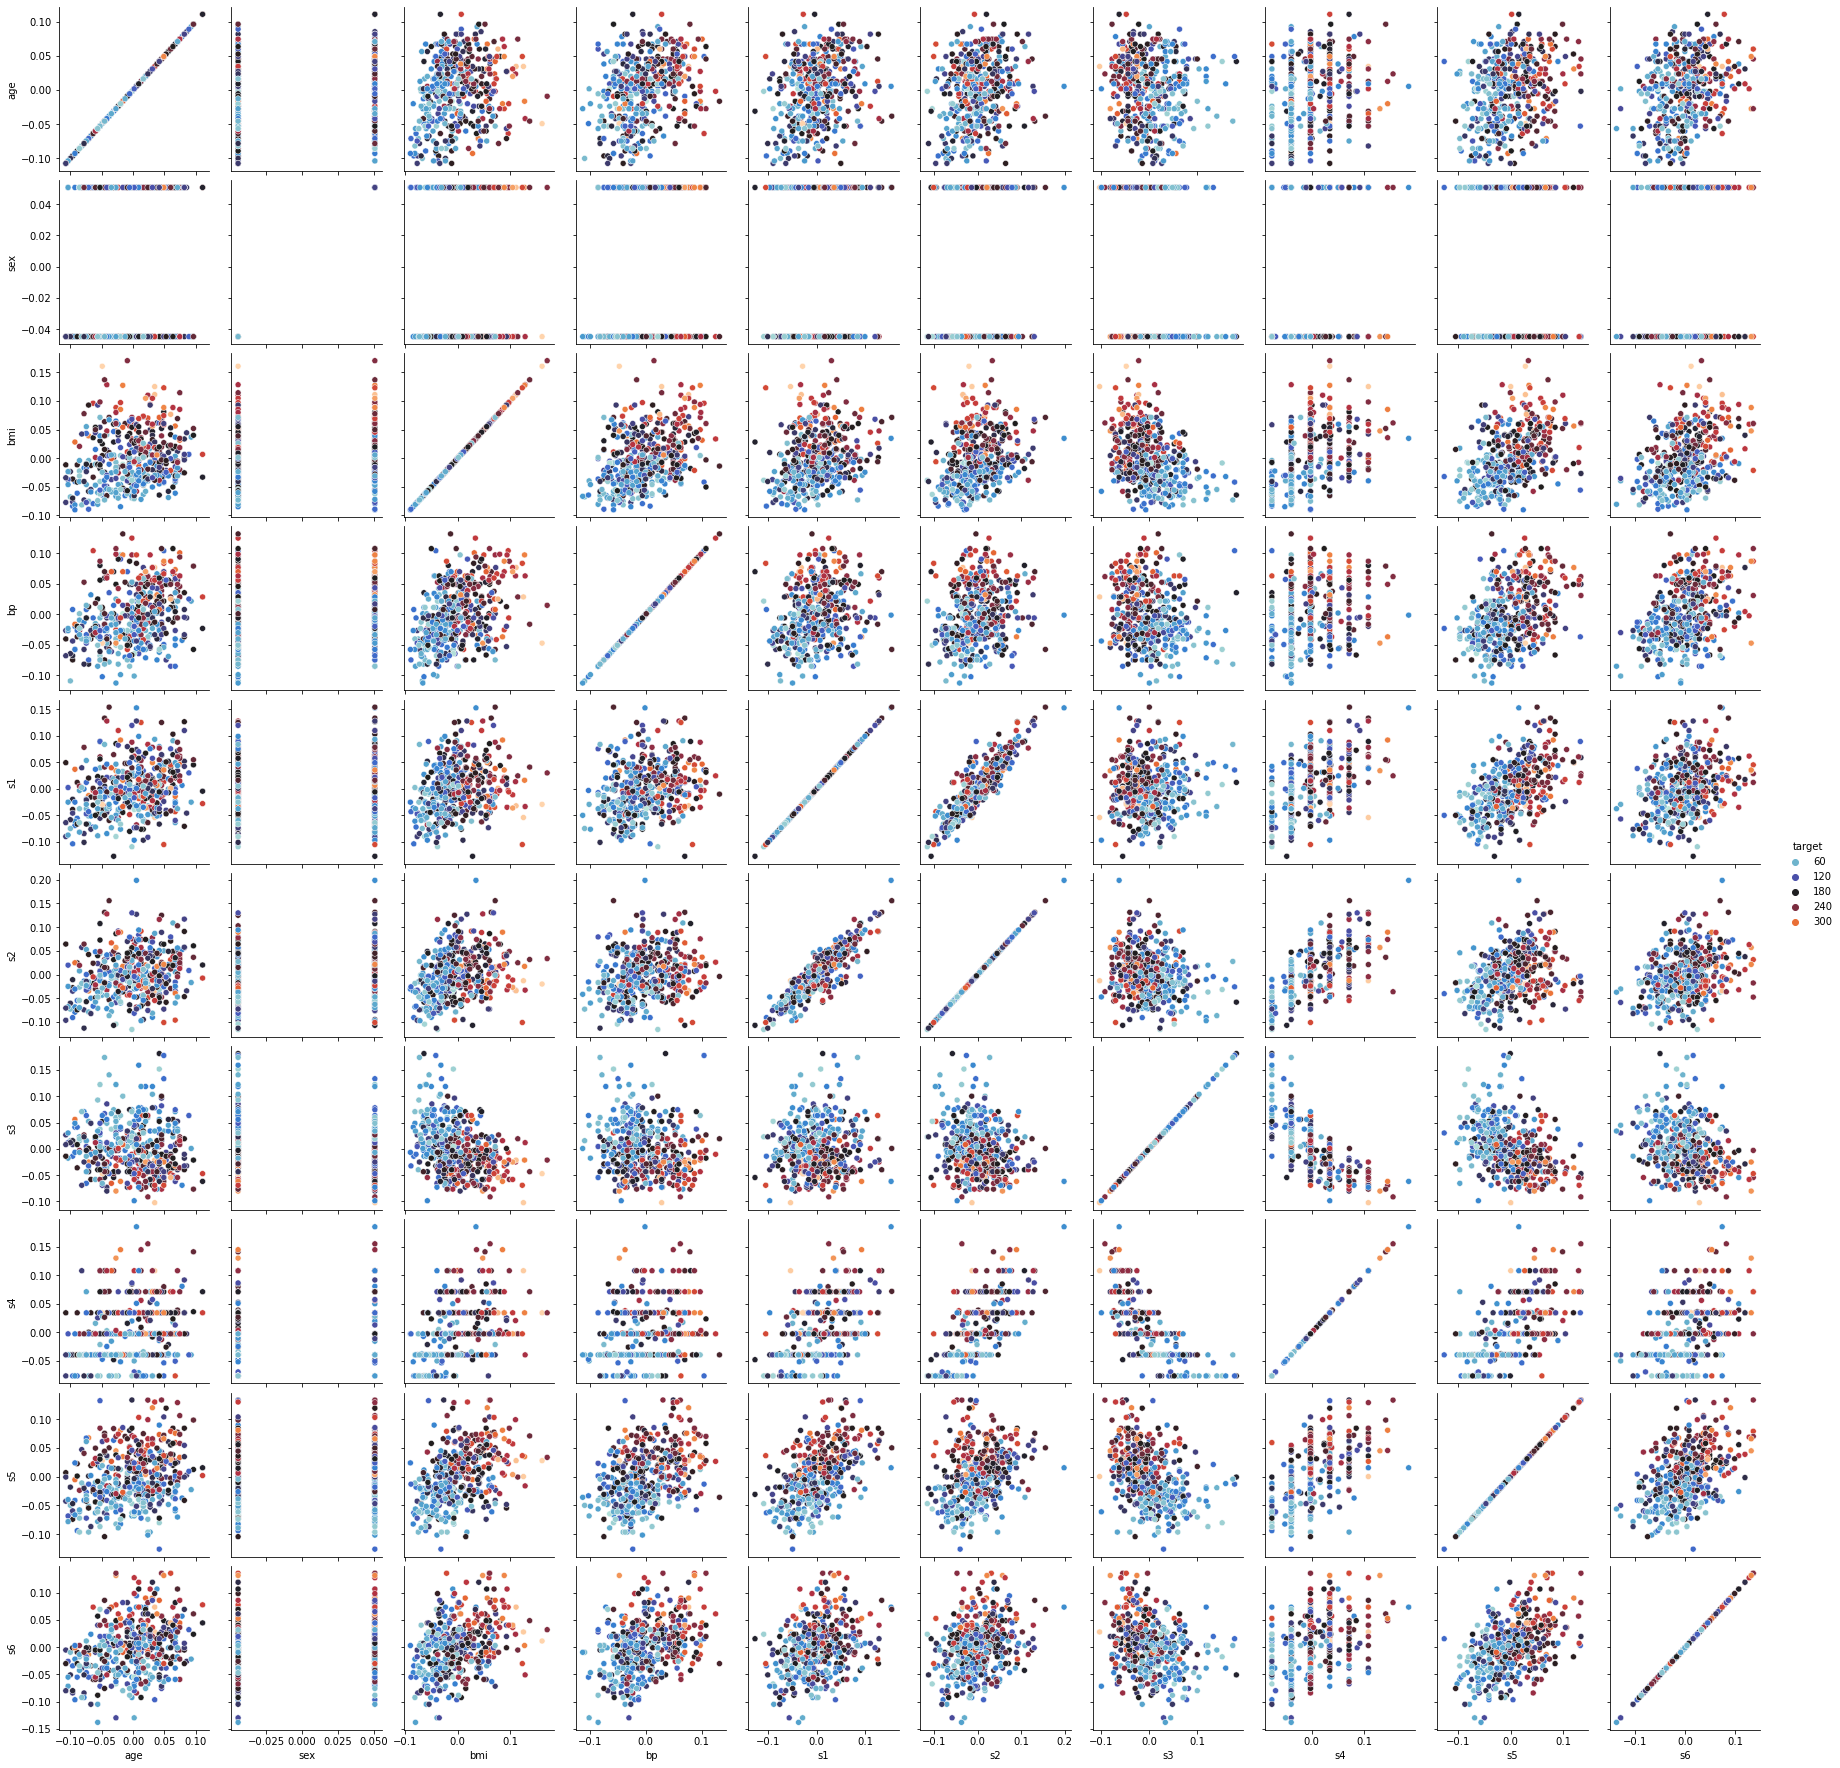

In [30]:
sns.pairplot(df_dia, hue = 'target', palette = 'icefire', diag_kind = None)
plt.draw()

## The decision tree as the first reference model<a class="anchor" id="decisiontree"></a>
Up to this point, we have only created sample data. Modeling is thus still pending. In order to understand the basic principle of machine learning algorithms on the one hand and to get to know the basic implementation of these algorithms in Python respectively scikit-learn on the other hand, we consider the decision tree as an example. [[3]](#sklearn2021c)

In [42]:
from sklearn import tree

The implementation of decision trees in scikit-learn allows their use for both classifications and regressions. This provides us with a tool for solving the problems created above, which may not lead to the best solution in many cases. However, decision trees have a high practical value due to their illustrativeness as well as the straightforward realization.

### Classification<a class="anchor" id="decisiontree_classification"></a>

In [43]:
# Split train and test set first
from sklearn.model_selection import train_test_split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc,
                                                        test_size    = 0.2,
                                                        random_state = 42)

In [44]:
print(Xc_train.shape)
print(Xc_test.shape)
print(yc_train.shape)
print(yc_test.shape)

(80, 6)
(20, 6)
(80,)
(20,)


In [45]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [46]:
clf = clf.fit(Xc_train, yc_train)
clf

DecisionTreeClassifier()

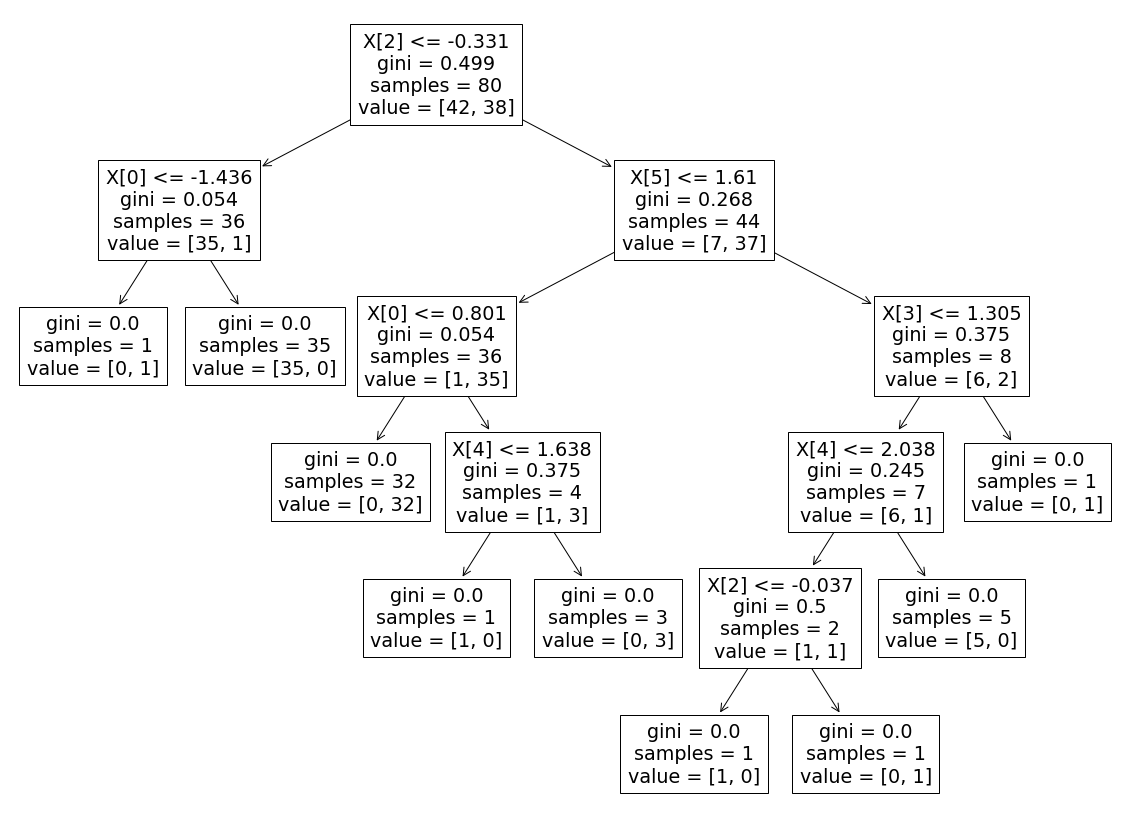

In [47]:
plt.figure(figsize = (20,15))
tree.plot_tree(clf)
plt.show()

In [48]:
yc_pred = clf.predict(Xc_test)
print(yc_pred)
print(yc_test)

[1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0]
[1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0]


In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, Xc_test, yc_test)  
plt.draw()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yc_test, yc_pred)

### Regression<a class="anchor" id="decisiontree_regression"></a>

In [49]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr,
                                                        test_size    = 0.2,
                                                        random_state = 42)

In [50]:
print(Xr_train.shape)
print(Xr_test.shape)
print(yr_train.shape)
print(yr_test.shape)

(80, 5)
(20, 5)
(80,)
(20,)


In [51]:
regr = tree.DecisionTreeRegressor()
regr.fit(Xr_train, yr_train)

DecisionTreeRegressor()

In [52]:
yr_pred = regr.predict(Xr_test)
print(yr_pred)
print(yr_test)

[-243.54084862 -208.31962443 -231.36564374   36.37016112 -240.48515838
 -240.48515838  -78.17397396  -45.55191994 -157.61806293  140.34594964
  140.34594964   43.68278103  126.75493947  272.52583414   56.94407542
 -243.54084862  -53.87997124  307.04234172  129.40011492    5.88180591]
[-162.83694309 -244.83966141 -155.47816356  -17.15194838   -7.95185511
    1.44857136 -222.82479326 -102.08544146 -211.84975471  -49.55452227
  -93.47833356  -18.63233309  141.60039025  141.39074843  -16.08318615
 -110.59741975  112.46769219  453.81829225 -158.50978159   39.79725084]


In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yr_test, yr_pred)

21221.749205978667

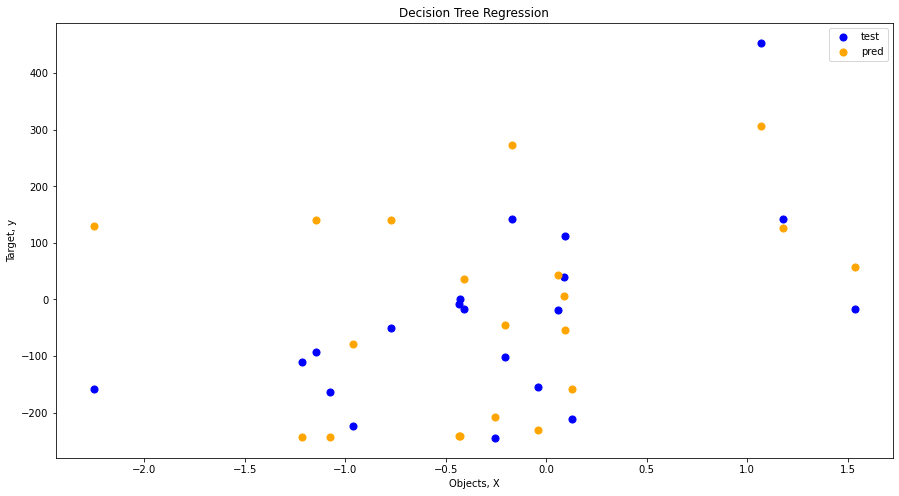

In [54]:
plt.figure(figsize = (15,8))
plt.scatter(Xr_test[:, 1], yr_test,
            s = 50, color = 'blue', label = "test")
plt.scatter(Xr_test[:, 1], yr_pred,
            s = 50, color = 'orange', label = 'pred')
plt.xlabel('Objects, X')
plt.ylabel("Target, y")
plt.title("Decision Tree Regression")
plt.legend()
plt.draw()

### Exercises<a class="anchor" id="decisiontree_exercises"></a>
1. Create a decision tree for each of the regression and classification problems you selected earlier from the Toy Datasets and interpret the result. Use only the default parameters of the tree.
2. Try to manually improve your result from 1. with the parameters of the decision tree.

## References<a class="anchor" id="references"></a>

[1]<a class="anchor" id="sklearn2021a"></a> The scikit-learn developers (2021). 7.3. Generated datasets. Retrieved 2021-04-18 from https://scikit-learn.org/stable/datasets/sample_generators.html

[2]<a class="anchor" id="sklearn2021b"></a> The scikit-learn developers (2021). 7.1. Toy datasets. Retrieved 2021-04-18 from https://scikit-learn.org/stable/datasets/toy_dataset.html

[3]<a class="anchor" id="sklearn2021c"></a> The scikit-learn developers (2021). 1.10. Decision Trees. Retrieved 2021-04-18 from https://scikit-learn.org/stable/modules/tree.html#decision-trees